In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-email-dataset/SpamAssasin.csv
/kaggle/input/phishing-email-dataset/Nazario.csv
/kaggle/input/phishing-email-dataset/Nigerian_Fraud.csv
/kaggle/input/phishing-email-dataset/CEAS_08.csv
/kaggle/input/phishing-email-dataset/Enron.csv
/kaggle/input/phishing-email-dataset/Ling.csv
/kaggle/input/phishing-email-dataset/phishing_email.csv
/kaggle/input/phishingemails/Phishing_Email.csv
/kaggle/input/phishing-email-detection-using-svm-rfc/__results__.html
/kaggle/input/phishing-email-detection-using-svm-rfc/__resultx__.html
/kaggle/input/phishing-email-detection-using-svm-rfc/__notebook__.ipynb
/kaggle/input/phishing-email-detection-using-svm-rfc/__output__.json
/kaggle/input/phishing-email-detection-using-svm-rfc/custom.css
/kaggle/input/phishing-email-detection-using-svm-rfc/__results___files/__results___9_0.png
/kaggle/input/phishing-dataset-for-machine-learning/Phishing_Legitimate_full.csv
/kaggle/input/nlp-meets-sms-distilbert-for-spam-detection/__results__.html
/kag

In [2]:
# Cell 1 - Imports and list dataset files
import os
import pandas as pd

# List files in both added dataset folders
paths = [
    '/kaggle/input/phishing-email-dataset',
    '/kaggle/input/phishingemails'
]

for path in paths:
    print(f"\n--- Listing files in: {path} ---\n")
    for root, dirs, files in os.walk(path):
        for f in files:
            print(os.path.join(root, f))



--- Listing files in: /kaggle/input/phishing-email-dataset ---

/kaggle/input/phishing-email-dataset/SpamAssasin.csv
/kaggle/input/phishing-email-dataset/Nazario.csv
/kaggle/input/phishing-email-dataset/Nigerian_Fraud.csv
/kaggle/input/phishing-email-dataset/CEAS_08.csv
/kaggle/input/phishing-email-dataset/Enron.csv
/kaggle/input/phishing-email-dataset/Ling.csv
/kaggle/input/phishing-email-dataset/phishing_email.csv

--- Listing files in: /kaggle/input/phishingemails ---

/kaggle/input/phishingemails/Phishing_Email.csv


In [3]:
# Cell 2 — Load and Inspect Dataset
import pandas as pd

# Path to dataset
dataset_path = '/kaggle/input/phishing-email-dataset/phishing_email.csv'

# Detect file type and load
if dataset_path.endswith('.csv'):
    df = pd.read_csv(dataset_path)
elif dataset_path.endswith('.xlsx'):
    df = pd.read_excel(dataset_path)
elif dataset_path.endswith('.json'):
    df = pd.read_json(dataset_path)
else:
    raise ValueError("⚠️ Unknown file type — please check the extension.")

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("\n🔹 Column names:")
print(df.columns.tolist())

# Display first few rows
df.head()


✅ Dataset loaded successfully!
Shape: (82486, 2)

🔹 Column names:
['text_combined', 'label']


,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


In [4]:
# Cell 3 — Data Preprocessing

import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Basic text cleaning
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', ' ', text)    # remove URLs
    text = re.sub(r'[^a-z0-9\s]', ' ', text)        # keep alphanumeric only
    text = re.sub(r'\s+', ' ', text).strip()        # normalize whitespace
    return text

# Apply cleaning
df['clean_text'] = df['text_combined'].apply(clean_text)

# Check for missing values
print("Missing values:", df['clean_text'].isna().sum())

# Split dataset
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF feature shape:", X_train_tfidf.shape)


Missing values: 0
Training samples: 65988
Testing samples: 16498
TF-IDF feature shape: (65988, 5000)



🔹 Training Logistic Regression...
✅ Logistic Regression Accuracy: 0.9817
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7919
           1       0.98      0.98      0.98      8579

    accuracy                           0.98     16498
   macro avg       0.98      0.98      0.98     16498
weighted avg       0.98      0.98      0.98     16498


🔹 Training Naive Bayes...
✅ Naive Bayes Accuracy: 0.9540
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7919
           1       0.98      0.93      0.95      8579

    accuracy                           0.95     16498
   macro avg       0.95      0.96      0.95     16498
weighted avg       0.96      0.95      0.95     16498


🔹 Training Random Forest...
✅ Random Forest Accuracy: 0.9862
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7919
           1       0.99      0.99      0.99

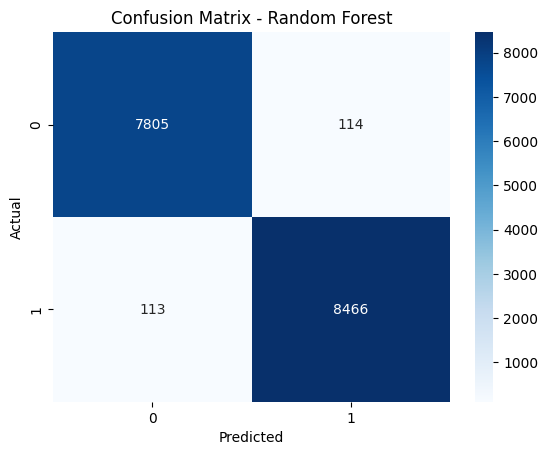

In [5]:
# Cell 4 — Train and Evaluate Baseline Models

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=150, class_weight='balanced', random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    results[name] = {
        "model": model,
        "accuracy": acc,
        "report": classification_report(y_test, y_pred, output_dict=True)
    }

# Find best model
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\n🏆 Best model: {best_model_name} ({results[best_model_name]['accuracy']:.4f})")

# Confusion matrix for best model
y_pred_best = best_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


In [6]:
# Cell 5 — Generate Adversarial Samples and Test Model Robustness
import random
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Simple adversarial perturbation functions
def char_substitution(text):
    substitutions = {'a':'@','o':'0','i':'1','e':'3','s':'$'}
    text_list = []
    for ch in text:
        if ch in substitutions and random.random() < 0.15:
            text_list.append(substitutions[ch])
        else:
            text_list.append(ch)
    return ''.join(text_list)

def add_noise_words(text):
    words = text.split()
    insert_words = ['please','verify','update','thankyou','confirm']
    for _ in range(max(1, int(len(words)*0.05))):
        idx = random.randint(0, len(words)-1)
        words.insert(idx, random.choice(insert_words))
    return ' '.join(words)

# Create adversarial test set
X_test_adv = X_test.apply(lambda x: add_noise_words(char_substitution(x)))
X_test_adv_tfidf = tfidf.transform(X_test_adv)

# Evaluate best model (Random Forest) on adversarial text
y_pred_adv = best_model.predict(X_test_adv_tfidf)

print("\n🔹 Accuracy on original clean test data:", accuracy_score(y_test, y_pred_best))
print("🔹 Accuracy on adversarially perturbed test data:", accuracy_score(y_test, y_pred_adv))
print("\nClassification Report on Adversarial Test:")
print(classification_report(y_test, y_pred_adv))



🔹 Accuracy on original clean test data: 0.9862407564553279
🔹 Accuracy on adversarially perturbed test data: 0.963631955388532

Classification Report on Adversarial Test:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7919
           1       0.97      0.96      0.96      8579

    accuracy                           0.96     16498
   macro avg       0.96      0.96      0.96     16498
weighted avg       0.96      0.96      0.96     16498



In [7]:
# Cell 6 (fixed) — Adversarial Training to Improve Robustness (robust to empty texts)

import random
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- Robust perturbation functions ---
def char_substitution(text, prob=0.12):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return text
    substitutions = {'a':'@','o':'0','i':'1','e':'3','s':'$','l':'1','t':'7'}
    out_chars = []
    for ch in text:
        if ch in substitutions and random.random() < prob:
            out_chars.append(substitutions[ch])
        else:
            out_chars.append(ch)
    return ''.join(out_chars)

def add_noise_words(text, noise_frac=0.05):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return text
    words = text.split()
    n = max(0, int(len(words) * noise_frac))
    insert_words = ['please','verify','update','thankyou','confirm','click']
    # if words is empty, just return text (defensive)
    if len(words) == 0:
        return text
    for _ in range(n):
        # choose safe index from 0..len(words) (inclusive) so we can insert at end too
        idx = random.randrange(0, len(words)+1)
        words.insert(idx, random.choice(insert_words))
    return ' '.join(words)

# --- create adversarial test set (we already created earlier; if not, create) ---
# If X_test_adv exists from earlier, keep; else create fresh
try:
    X_test_adv
except NameError:
    X_test_adv = X_test.apply(lambda x: add_noise_words(char_substitution(x)))

# Transform adversarial test with current tfidf
X_test_adv_tfidf = tfidf.transform(X_test_adv)

# Evaluate current best_model (RandomForest) on adversarial test (before adv-training)
y_pred_adv_before = best_model.predict(X_test_adv_tfidf)
print("Before adversarial training:")
print(" - Clean test accuracy (before):", accuracy_score(y_test, y_pred_best))
print(" - Adversarial test accuracy (before):", accuracy_score(y_test, y_pred_adv_before))
print()

# --- Create adversarial training set safely (use list comprehension, skip empty if present) ---
X_train_list = X_train.tolist()
X_train_adv_list = [ add_noise_words(char_substitution(t)) if isinstance(t, str) and t.strip() else t for t in X_train_list ]

# Combine (preserve index mismatch by creating new Series)
import pandas as pd
X_train_combined = pd.Series(X_train_list + X_train_adv_list)
y_train_combined = pd.Series(list(y_train) + list(y_train))  # doubles labels

print("Training samples (clean):", len(X_train_list))
print("Adversarial samples created:", len(X_train_adv_list))
print("Combined training size:", len(X_train_combined))

# --- Refit TF-IDF on combined training data (recommended when text distribution changes) ---
tfidf_comb = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_combined_tfidf = tfidf_comb.fit_transform(X_train_combined)
X_test_tfidf_comb = tfidf_comb.transform(X_test)         # clean test under new vectorizer
X_test_adv_tfidf_comb = tfidf_comb.transform(X_test_adv) # adv test under new vectorizer

# --- Retrain Random Forest on combined data ---
model_adv = RandomForestClassifier(n_estimators=150, class_weight='balanced', random_state=42, n_jobs=-1)
print("\nTraining adversarially-augmented Random Forest...")
model_adv.fit(X_train_combined_tfidf, y_train_combined)

# --- Evaluate after adversarial training ---
y_pred_clean_after = model_adv.predict(X_test_tfidf_comb)
y_pred_adv_after = model_adv.predict(X_test_adv_tfidf_comb)

print("\nAfter adversarial training:")
print(" - Clean test accuracy (after):", accuracy_score(y_test, y_pred_clean_after))
print(" - Adversarial test accuracy (after):", accuracy_score(y_test, y_pred_adv_after))
print("\nClassification report on adversarial test (after):")
print(classification_report(y_test, y_pred_adv_after))


Before adversarial training:
 - Clean test accuracy (before): 0.9862407564553279
 - Adversarial test accuracy (before): 0.963631955388532

Training samples (clean): 65988
Adversarial samples created: 65988
Combined training size: 131976

Training adversarially-augmented Random Forest...

After adversarial training:
 - Clean test accuracy (after): 0.9856346223784701
 - Adversarial test accuracy (after): 0.9795732816098921

Classification report on adversarial test (after):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7919
           1       0.98      0.98      0.98      8579

    accuracy                           0.98     16498
   macro avg       0.98      0.98      0.98     16498
weighted avg       0.98      0.98      0.98     16498

